In [1]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

%matplotlib inline

PCA é uma técnica de redução de dimensionalidade de variáveis contínuas, escolhendo uma nova base pro espaço vetorial de forma que cada novo vetor da base ("componente") maximize a explicação de variância nos dados.

In [2]:
iris = load_iris()
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [3]:
pca3 = PCA(n_components=3)
pca3.fit(iris.data)
pca3

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [4]:
pca3.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647],
       [-0.58099728,  0.59641809,  0.07252408,  0.54906091]])

In [5]:
pca3.mean_

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

Para reduzir a dimensionalidade dos dados, é subtraído a média de cada atributo, e então com o resultado é feito o produto interno com as componentes calculadas pelo PCA. Assim, o vetor original é reduzido a um vetor com tamanho igual ao número de componentes. Essa operação também está presente no método `transform`, que recebe uma matriz e aplica a transformação para todas as instâncias.

In [6]:
pca3.components_ @ (iris.data[0] - pca3.mean_)

array([-2.68420713,  0.32660731, -0.02151184])

In [7]:
pca3.transform(iris.data)[:5]

array([[-2.68420713,  0.32660731, -0.02151184],
       [-2.71539062, -0.16955685, -0.20352143],
       [-2.88981954, -0.13734561,  0.02470924],
       [-2.7464372 , -0.31112432,  0.03767198],
       [-2.72859298,  0.33392456,  0.0962297 ]])

É possível fazer a transformação inversa, mas acaba sendo uma aproximação pois um pouco de informação é perdido na redução.

In [8]:
pca3.inverse_transform(np.array([-2.68, 0.32, -0.02]))

array([5.09598571, 3.49606022, 1.40535737, 0.20207766])

In [9]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

A maior vantagem do PCA é poder visualizar dados em dimensões maiores que 3.

In [10]:
iris_t = pca3.transform(iris.data)

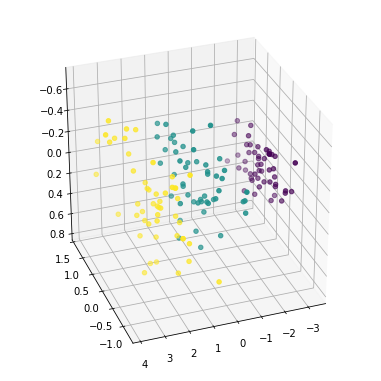

In [11]:
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(xs=iris_t[:, 0], ys=iris_t[:, 1], zs=iris_t[:, 2], c=iris.target);

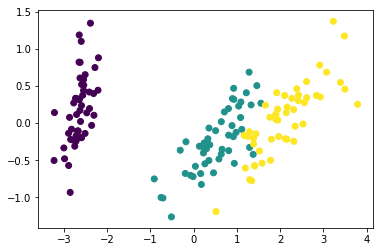

In [12]:
pca2 = PCA(n_components=2)
pca2.fit(iris.data)
iris2d = pca2.transform(iris.data)
# iris2d = PCA(n_components=2).fit_transform(iris.data)
plt.scatter(iris2d[:, 0], iris2d[:, 1], c=iris.target);

O atributo `explained_variance_` mostra quanto da variância dos dados a componente explica (em valores absolutos).

In [13]:
pca3.explained_variance_

array([4.22484077, 0.24224357, 0.07852391])

In [14]:
pca2.explained_variance_

array([4.22484077, 0.24224357])

Note que o PCA é um método incremental, a ordem dos componentes escolhidos é sempre a mesma.

In [15]:
pca2.components_, pca3.components_

(array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
        [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]]),
 array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
        [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647],
        [-0.58099728,  0.59641809,  0.07252408,  0.54906091]]))

O atributo `explained_variance_ratio_` mostra quanto do total da variância cada componente explica.

In [16]:
pca3.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514])

In [17]:
pca3.explained_variance_ratio_.sum()

0.9948169145498101

In [18]:
pca2.explained_variance_ratio_.sum()

0.9776317750248034

É comum utilizar um número de componentes iguais ao número de dimensões (assumindo que existem mais instâncias do que dimensões) para verificar a explicação de variância. Obviamente, todas as componentes unidas tem que poder explicar todo o espaço original, e sua razão de explicação é 1.

In [19]:
pca_cheio = PCA(n_components=None)
pca_cheio.fit(iris.data)
pca_cheio.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

In [20]:
pca_cheio.explained_variance_ratio_.sum()

1.0

De maior interesse é quanto de variância é explicado com determinado número de componentes. Para isso, basta fazer a soma cumulativa, `[x0, x0 + x1, x0 + x1 + x2, ..., x.sum()] == x.cumsum()`.

In [21]:
pca_cheio.explained_variance_ratio_.cumsum()

array([0.92461621, 0.97763178, 0.99481691, 1.        ])

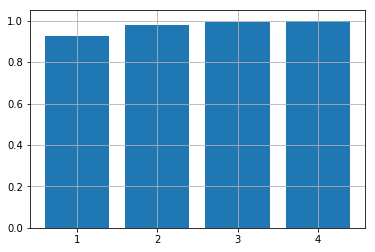

In [22]:
x = [str(x + 1) for x in range(4)]
y = pca_cheio.explained_variance_ratio_.cumsum()
plt.bar(x, y)
plt.grid();